In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

# Database use of this section 
titanic = sns.load_dataset('titanic')

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Clean data

In [17]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [18]:
titanic = titanic.dropna(axis=0, how='any')
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

Check if perhaps better to use fillna later!

## Display quick information about dataset

In [19]:
titanic.query('survived == 1 & sex == "male"').count() / titanic.count() 

survived       0.225275
pclass         0.225275
sex            0.225275
age            0.225275
sibsp          0.225275
parch          0.225275
fare           0.225275
embarked       0.225275
class          0.225275
who            0.225275
adult_male     0.225275
deck           0.225275
embark_town    0.225275
alive          0.225275
alone          0.225275
dtype: float64

In [20]:
#  pivot tables can be specified with multiple levels
# using pd.cut to get age intervals
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

In [21]:
# using pd.qcut to automatically compute quantiles
fare = pd.qcut(titanic['fare'], 2)
# Sex and age use as multi Index
# Fare pair and class use as columns
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 57.0]                     (57.0, 512.329]
class                    First    Second     Third           First
sex    age                                                        
female (0, 18]        1.000000  1.000000  0.500000        0.888889
       (18, 80]       0.941176  0.875000  0.666667        0.978261
male   (0, 18]             NaN  1.000000  1.000000        0.800000
       (18, 80]       0.437500  0.333333  0.250000        0.333333

Seems class, age and sex are great features. Later we will take look at all correlation between these variables. Now let clean data and select features we want.

## Identify correlations between data

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


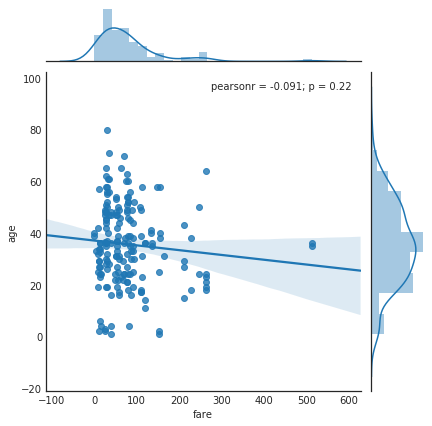

In [22]:
from matplotlib import pyplot as plt
plt.style.context('ggplot')

with sns.axes_style('white'):
    sns.jointplot("fare", "age", titanic, kind='reg')

Coefficient of correlation is very low, furthermore, p-value is > 5%.

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


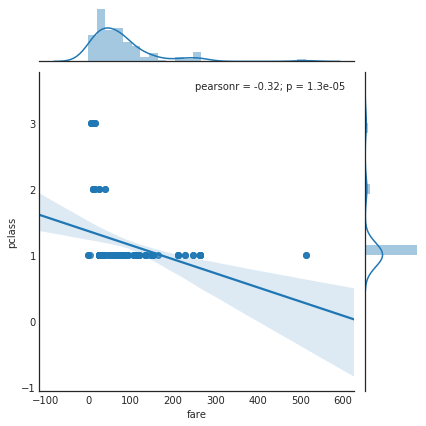

In [23]:
with sns.axes_style('white'):
    sns.jointplot("fare", "pclass", titanic, kind='reg')

pclass and fare seem to be significative. Little correlation is present, furthermore, p-value is < 5%.


Let's now take a look at data 'survived' which is the data we want to explain.

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


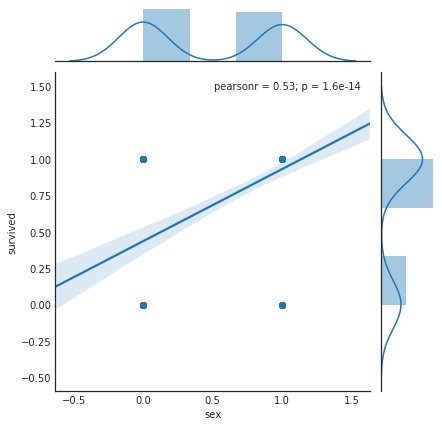

In [24]:
cp_clean_titanic = titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("sex", "survived", cp_clean_titanic, kind='reg')

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


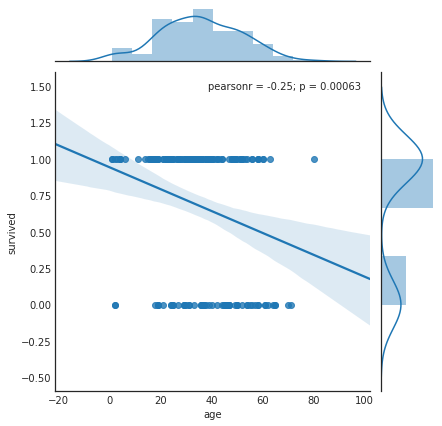

In [25]:
cp_clean_titanic = titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("age", "survived", cp_clean_titanic, kind='reg')

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


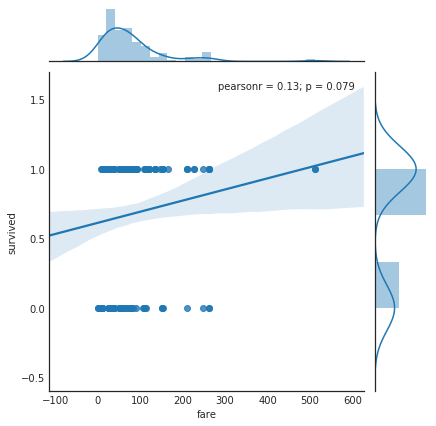

In [26]:
cp_clean_titanic = titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("fare", "survived", cp_clean_titanic, kind='reg')

With information obtained with these correlation, let's try using Logistic Regression. But before we have to select our features.

## Features selection

In [27]:
# Just to remember
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing

# Split DATA
# drop species target array for features matrix

clean_titanic = titanic.drop(['alive', 'who', 'class', 'deck', 'embarked', 'sibsp', 'parch'], axis=1)


# target Array
y_titanic = clean_titanic['survived']


# then drop survided col
X_titanic = clean_titanic.drop(['survived'], axis=1)

# Make only two classes for ages using cut ?
X_titanic['age'] = pd.cut(X_titanic['age'], [0, 10, 15, 18, 40, 80])
#X_titanic['age'] = X_titanic['age'].map({'(0, 18]': 0, '(18, 80]': 1}) # to improve
#X_titanic['age'] = 10 * X_titanic['age'] // 10
X_titanic = pd.get_dummies(X_titanic)
#X_titanic.head()


print(X_titanic.head())

vec = DictVectorizer(sparse=True, dtype=int)
X_titanic = vec.fit_transform(X_titanic.T.to_dict().values())
print(X_titanic.shape)

X_titanic = pd.DataFrame(X_titanic.toarray())

    pclass     fare  adult_male  alone  sex_female  sex_male  age_(0, 10]  \
1        1  71.2833       False  False           1         0            0   
3        1  53.1000       False  False           1         0            0   
6        1  51.8625        True   True           0         1            0   
10       3  16.7000       False  False           1         0            1   
11       1  26.5500       False   True           1         0            0   

    age_(10, 15]  age_(15, 18]  age_(18, 40]  age_(40, 80]  \
1              0             0             1             0   
3              0             0             1             0   
6              0             0             0             1   
10             0             0             0             0   
11             0             0             0             1   

    embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  
1                       1                       0                        0  
3         

## Logistic Regression

In [29]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=0)

from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7818


82% is correct but we can do better! Perhaps change kernel approximation

In [31]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X_titanic, y_titanic, cv=5)
print('Accuracy of logistic regression classifier with cross validation: {:.4f}'.format(scores.mean()))

Accuracy of logistic regression classifier with cross validation: 0.7523


## Naive Bayesian classification

### Gaussian Naive Bayesian classification

In [32]:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(X_train, y_train);

In [33]:
print('Accuracy of Gaussian Naive Bayesian classification on test set: {:.4f}'.format(g_model.score(X_test, y_test)))

Accuracy of Gaussian Naive Bayesian classification on test set: 0.8000


In [34]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(g_model, X_titanic, y_titanic, cv=5)
print('Accuracy of Gaussian Naive Bayesian classification with cross validation: {:.4f}'.format(scores.mean()))

Accuracy of Gaussian Naive Bayesian classification with cross validation: 0.7584


### Multinomial Naive Bayesian classification

In [35]:
from sklearn.naive_bayes import MultinomialNB
m_model = MultinomialNB()
m_model.fit(X_train, y_train);
print('Accuracy of Multinomial Naive Bayesian classification on test set: {:.4f}'.format(m_model.score(X_test, y_test)))

Accuracy of Multinomial Naive Bayesian classification on test set: 0.7636


In [36]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(m_model, X_titanic, y_titanic, cv=5)
print('Accuracy of Multinomial Naive Bayesian classification with cross validation: {:.4f}'.format(scores.mean()))

Accuracy of Multinomial Naive Bayesian classification with cross validation: 0.7366


Globally, Naive Bayesian seems to not be the best model (perhaps parameters ?).

## Try using PCA which is a fast linear dimensionality reduction technique

In [37]:
# Try separate data using PCA
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_titanic)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_titanic)         # 4. Transform the data to two dimensions

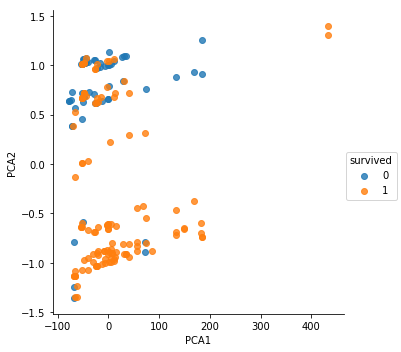

In [38]:
# let's plot result
clean_titanic['PCA1'] = X_2D[:, 0]
clean_titanic['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='survived', data=clean_titanic, fit_reg=False);

PCA seems to not be the great model for this problem. Later we will try improve PCA performance by changing features selected. Then, try using logistic regression on that or SVM.

## Test using Support Vector Classifier with PCA data

In [39]:
# function for plotting 2D SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [40]:
from sklearn.svm import SVC # "Support vector classifier"

clf = SVC(kernel='rbf', C=1E6)
X_PCA = clean_titanic[['PCA1', 'PCA2']]
y_PCA = clean_titanic['survived']
clf.fit(X_PCA, y_PCA)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

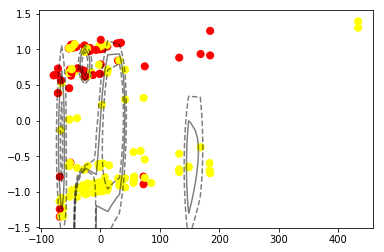

In [41]:
plt.scatter(clean_titanic['PCA1'], clean_titanic['PCA2'], c=y_PCA, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [42]:
# probably due to overfitting
print('Accuracy of Support vector classification on test set: {:.2f}'.format(clf.score(X_PCA, y_PCA)))

Accuracy of Support vector classification on test set: 0.97


In [43]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_PCA, y_PCA, cv=5)
print('Accuracy of Support vector classification with cross validation: {:.2f}'.format(scores.mean()))

Accuracy of Support vector classification with cross validation: 0.69


## Test using Logistic Regression with PCA data

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y_PCA, test_size=0.3, random_state=0)

from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_PCA_train, y_PCA_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
print('Accuracy of logistic regression classifier on PCA test set: {:.2f}'.format(logreg.score(X_PCA_test, y_PCA_test)))

Accuracy of logistic regression classifier on PCA test set: 0.80


In [46]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X_PCA, y_PCA, cv=5)
print('Accuracy of logistic regression classifier with cross validation on PCA set: {:.2f}'.format(scores.mean()))

Accuracy of logistic regression classifier with cross validation on PCA set: 0.74


## Conclusion

Here methods seems to give often results in same range. One thing to do is to clear data and adapt it more. We have to take care of the most important columns, checking correlation between them and create new column if necessary. So go to Second part of Kaggle Titanic.